In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

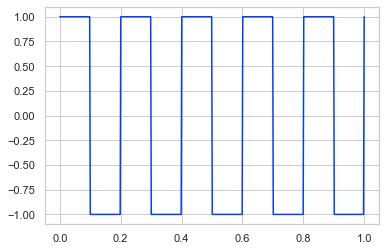

In [74]:
t = np.linspace(0,1,500)
s = signal.square(2 * np.pi * 5 * t)
plt.plot(t, s)

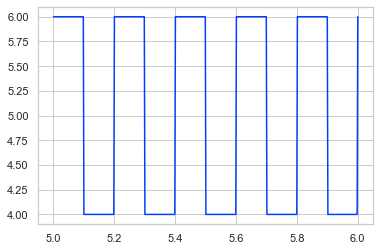

In [75]:
t2 = t + 5
s2 = s + 5
plt.plot(t2, s2)

In [76]:
from scipy.stats import wasserstein_distance

In [77]:
wasserstein_distance(s,s2)

5.0

In [78]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_2 = pd.DataFrame(zip(t2,s2),columns=['Time','Value'])

In [79]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

In [80]:
jaccard(signal_1,signal_2)

0.002997002997002997

# FFT - Real and Imag

In [81]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

<StemContainer object of 3 artists>

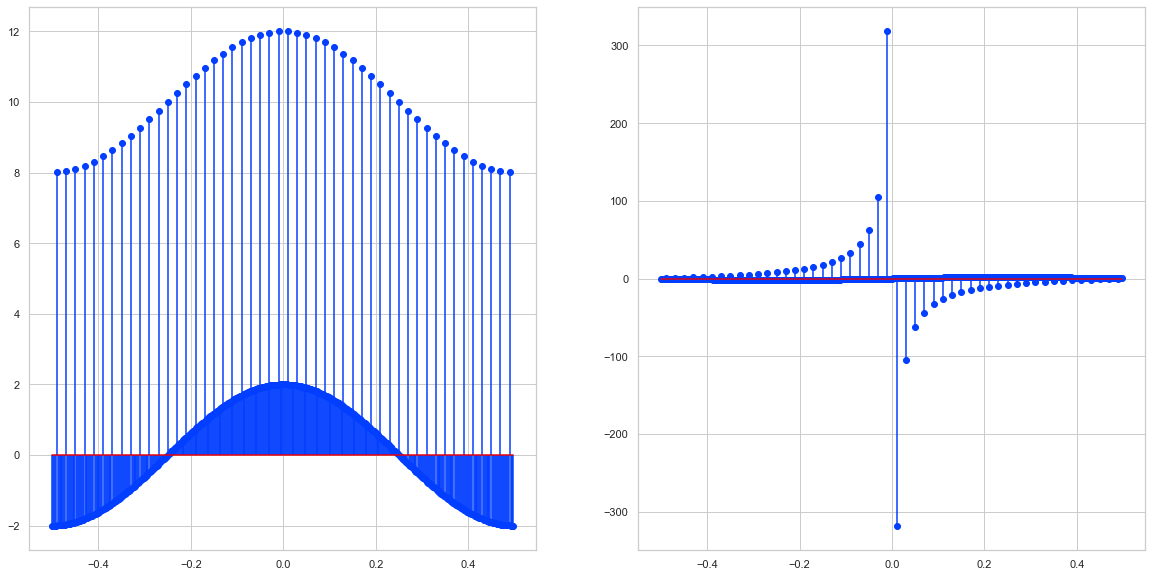

In [82]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

<StemContainer object of 3 artists>

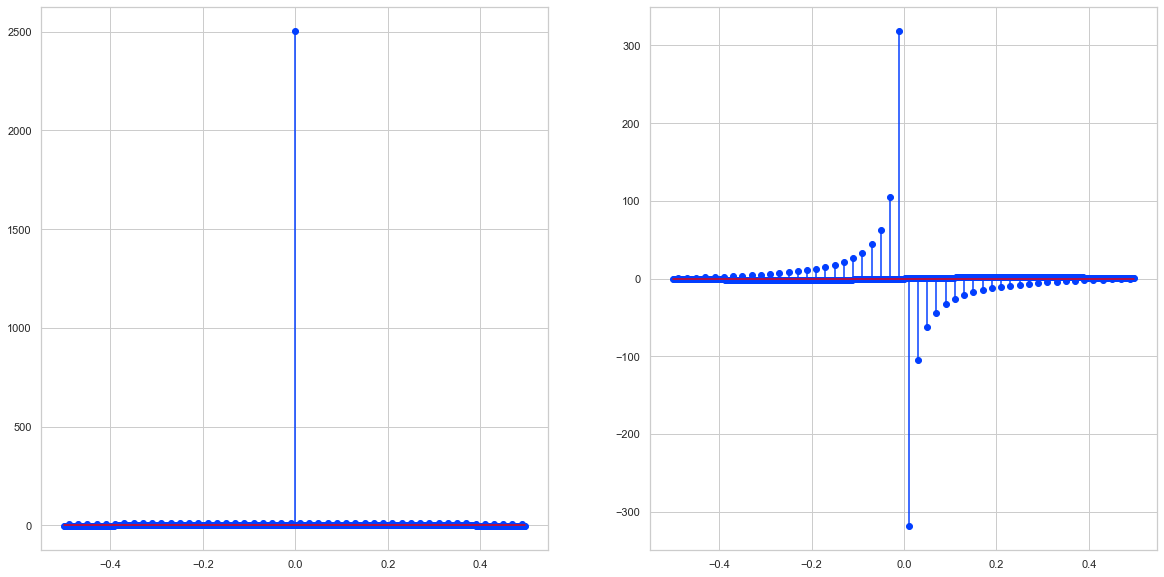

In [83]:
freq_ampli2,freq_ampli2i = freq(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

In [84]:
print("Real: ",wasserstein_distance(freq_ampli1['Ampli'], freq_ampli2['Ampli']))
print("Imaginary", wasserstein_distance(freq_ampli1i['Ampli'], freq_ampli2i['Ampli']))

Real:  5.000000000000004
Imaginary 1.0222933610748438e-15


In [85]:
freq_ampli1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1,freq_ampli2))
freq_ampli1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9960238568588469


In [86]:
freq_ampli1i.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2i.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1i,freq_ampli2i))
freq_ampli1i.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2i.rename(columns = {'Value': 'Ampli'}, inplace = True)

1.0


# FFT - Magnitude and phase

In [87]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [88]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

<StemContainer object of 3 artists>

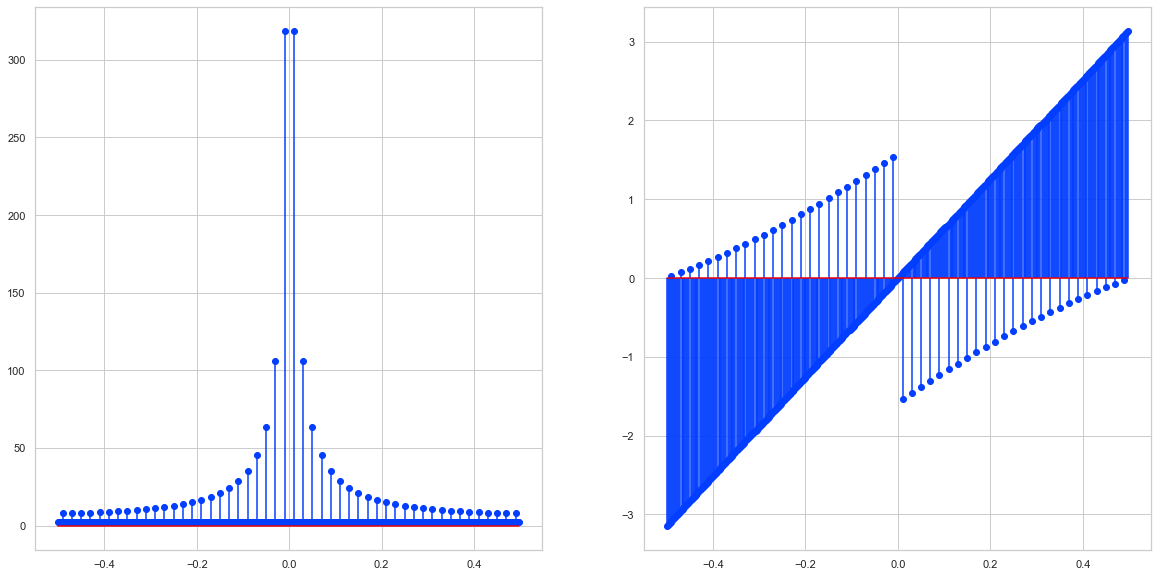

In [89]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])

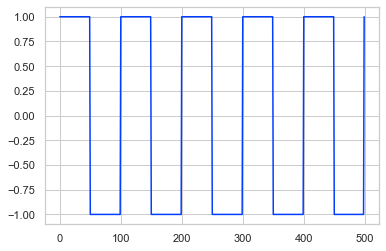

In [90]:
import math
import numpy.fft as FFT
def inverse_mag_phase(df1, df2):
    mag = df1['Ampli'].to_numpy()
    phase = df2['Phase'].to_numpy()
    for_ifft = [[] for i in range(len(mag))]
    for i in range(len(mag)):
            rl = mag[i]*math.cos(phase[i])
            im = mag[i]*math.sin(phase[i])
            for_ifft[i].append(complex(rl,im))
    ifftc = FFT.ifft2(for_ifft)
    return ifftc
ifft_mag_phase1 = inverse_mag_phase(freq_ampli_mag1, freq_ampli_phase1)
plt.plot(ifft_mag_phase1)

In [91]:
from scipy.spatial import distance
distance.euclidean(s,ifft_mag_phase1)

6.2716842018025994e-15

<StemContainer object of 3 artists>

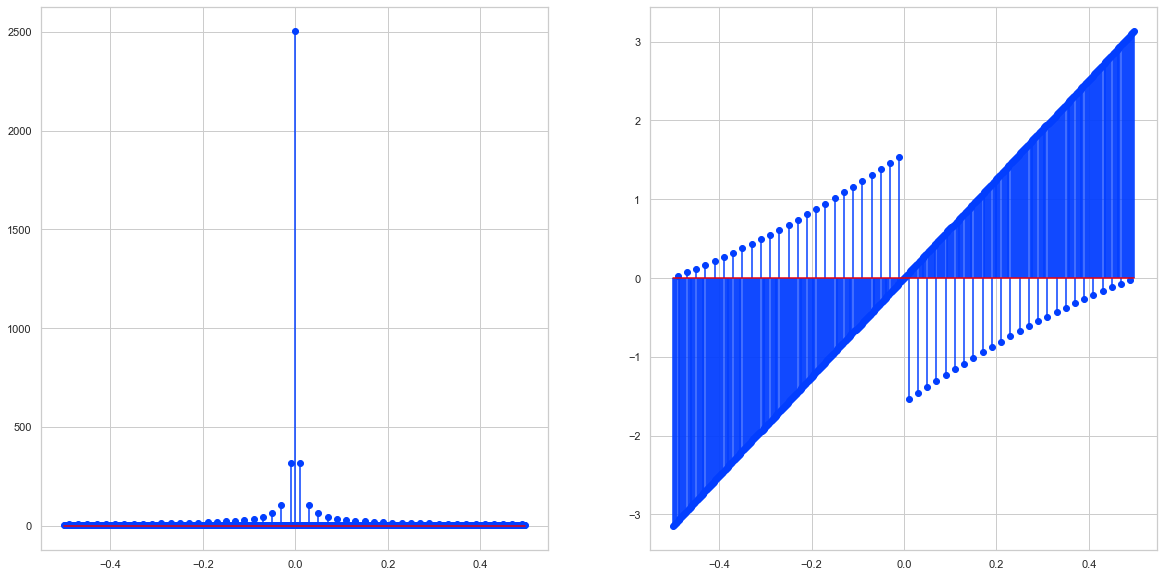

In [92]:
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

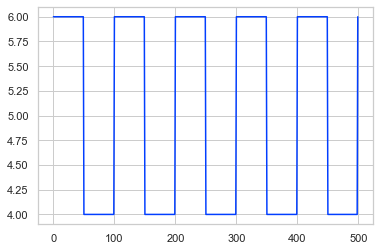

In [93]:
ifft_mag_phase2 = inverse_mag_phase(freq_ampli_mag2, freq_ampli_phase2)
plt.plot(ifft_mag_phase2)

In [94]:
distance.euclidean(s2,ifft_mag_phase2)

7.172241333676465e-15

In [95]:
print("Magnitude: ",(wasserstein_distance(freq_ampli_mag1['Ampli'], freq_ampli_mag2['Ampli'])))
print("Phase", wasserstein_distance(freq_ampli_phase1['Phase'], freq_ampli_phase2['Phase']))

Magnitude:  5.000000000000004
Phase 3.374384105470085e-16


In [96]:
freq_ampli_mag1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli_mag1,freq_ampli_mag2))
freq_ampli_mag1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9960238568588469


In [97]:
freq_ampli_phase1.rename(columns = {'Phase':'Value'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Phase':'Value'}, inplace = True)
print(jaccard(freq_ampli_phase1,freq_ampli_phase2))
freq_ampli_phase1.rename(columns = {'Value': 'Phase'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Value': 'Phase'}, inplace = True)

1.0


# Cepstrum

In [98]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [99]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[ 0.91148334  0.19871173 -0.0014551   0.06557118 -0.00153049  0.0390947
 -0.00161338  0.02785582 -0.00170492  0.02169796 -0.00180646  0.01785283
 -0.00191964  0.01525735 -0.00204649  0.01341709 -0.00218951  0.01207211
 -0.00235186  0.01107399 -0.00253752  0.01033333 -0.00275164  0.00979483
 -0.003001    0.00942478 -0.00329461  0.00920454 -0.00364484  0.00912763
 -0.00406902  0.00919922 -0.00459222  0.00943812 -0.00525213  0.00988224
 -0.00610806  0.01060049 -0.00725896  0.01171863 -0.00888314  0.01348049
 -0.0113374   0.0164149  -0.01545468  0.02190341 -0.02373085  0.03497774
 -0.04805945  0.09037465 -0.21833616 -0.19871173  0.0014551  -0.06557118
  0.00153049 -0.0390947   0.00161338 -0.02785582  0.00170492 -0.02169796
  0.00180646 -0.01785283  0.00191964 -0.01525735  0.00204649 -0.01341709
  0.00218951 -0.01207211  0.00235186 -0.01107399  0.00253752 -0.01033333
  0.00275164 -0.00979483  0.003001   -0.00942478  0.00329461 -0.00920454
  0.00364484 -0.00912763  0.00406902 -0.00919922  0.

In [100]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[ 9.25746741e-01  2.12975123e-01  1.28082940e-02  7.98345730e-02
  1.27329118e-02  5.33580975e-02  1.26500143e-02  4.21192173e-02
  1.25584756e-02  3.59613523e-02  1.24569394e-02  3.21162251e-02
  1.23437575e-02  2.95207465e-02  1.22169077e-02  2.76804851e-02
  1.20738833e-02  2.63355047e-02  1.19115398e-02  2.53373902e-02
  1.17258814e-02  2.45967266e-02  1.15117546e-02  2.40582304e-02
  1.12624010e-02  2.36881750e-02  1.09687848e-02  2.34679353e-02
  1.06185548e-02  2.33910251e-02  1.01943807e-02  2.34626159e-02
  9.67118106e-03  2.37015167e-02  9.01126979e-03  2.41456414e-02
  8.15534081e-03  2.48638900e-02  7.00443474e-03  2.59820256e-02
  5.38026130e-03  2.77438914e-02  2.92599930e-03  3.06782940e-02
 -1.19128513e-03  3.61668021e-02 -9.46744931e-03  4.92411365e-02
 -3.37960535e-02  1.04638043e-01 -2.04072766e-01 -1.84448329e-01
  1.57185001e-02 -5.13077790e-02  1.57938823e-02 -2.48313035e-02
  1.58767798e-02 -1.35924233e-02  1.59683184e-02 -7.43455825e-03
  1.60698546e-02 -3.58943

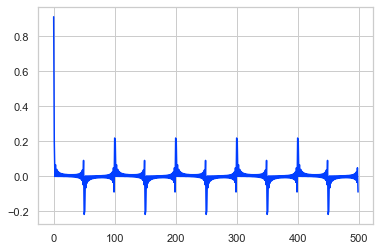

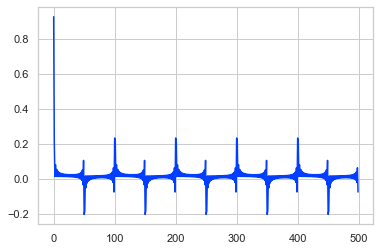

In [101]:
plt.plot(ceps1)
plt.show()
plt.plot(ceps2)

In [102]:
print(wasserstein_distance(ceps1,ceps2))

0.014263397020933821


In [103]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])

In [104]:
print(jaccard(cepstrum1,cepstrum2))

0.4101123595505618


## Results

In [105]:
from prettytable import PrettyTable

+-------------+---------------+---------------+-----+----------------------+
| Signal Type |    Signal 1   |    Signal 2   | EMD |       Jaccard        |
+-------------+---------------+---------------+-----+----------------------+
| Time Series | Multi Sines 1 | Multi Sines 2 | 5.0 | 0.002997002997002997 |
+-------------+---------------+---------------+-----+----------------------+


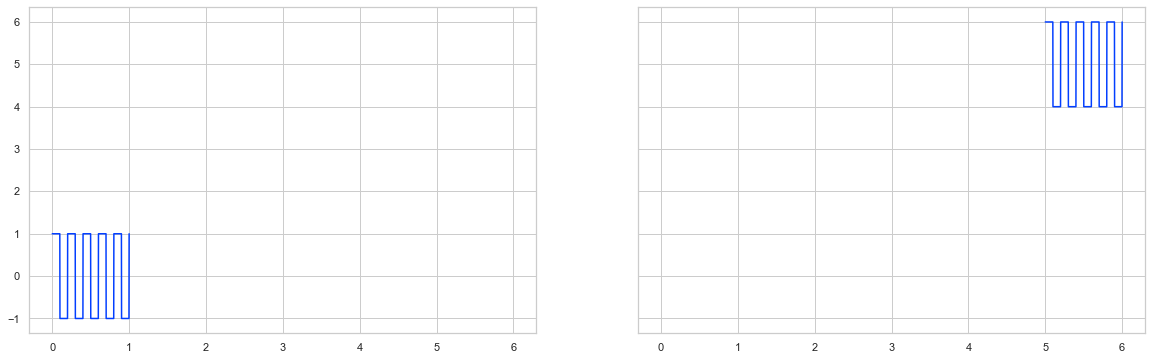

In [106]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
table = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table.add_row(['Time Series','Multi Sines 1','Multi Sines 2',wasserstein_distance(s,s2),jaccard(signal_1,signal_2)])
print(table)

+-------------+---------------+---------------+-------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD        |      Jaccard       |
+-------------+---------------+---------------+-------------------+--------------------+
|    Freq_R   | Multi Sines 1 | Multi Sines 2 | 7.676767676767664 |        1.0         |
|    Freq_I   | Multi Sines 1 | Multi Sines 2 | 9.241886205576499 | 0.8545454545454545 |
+-------------+---------------+---------------+-------------------+--------------------+


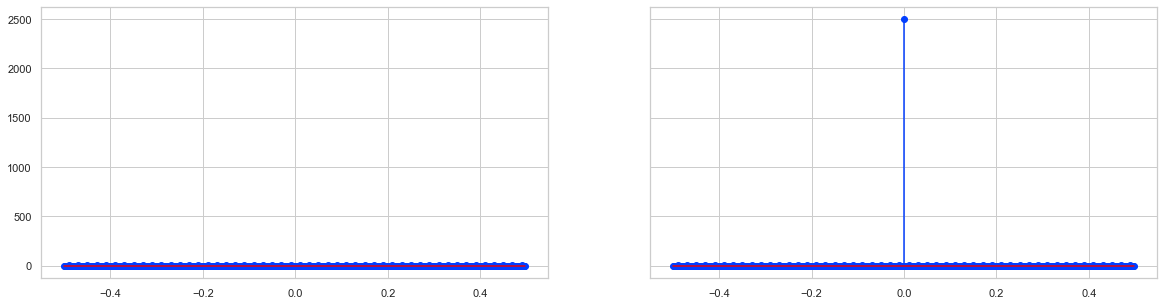

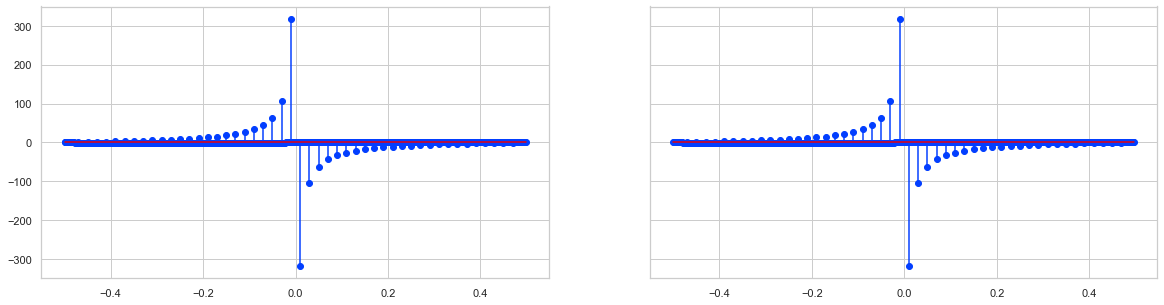

In [107]:
fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

table2 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table2.add_row(['Freq_R','Multi Sines 1','Multi Sines 2',7.676767676767664,1.0])
table2.add_row(['Freq_I','Multi Sines 1','Multi Sines 2',9.241886205576499, 0.8545454545454545])
print(table2)

+-------------+---------------+---------------+---------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |      Jaccard       |
+-------------+---------------+---------------+---------------------+--------------------+
|   Freq_Mag  | Multi Sines 1 | Multi Sines 2 |  12.308618117207757 | 0.9245283018867925 |
|  Freq_Phase | Multi Sines 1 | Multi Sines 2 | 0.39269908169872414 | 0.6859504132231405 |
+-------------+---------------+---------------+---------------------+--------------------+


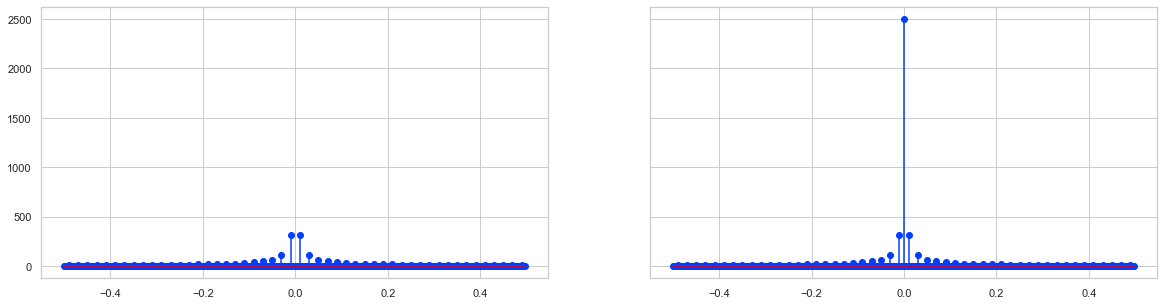

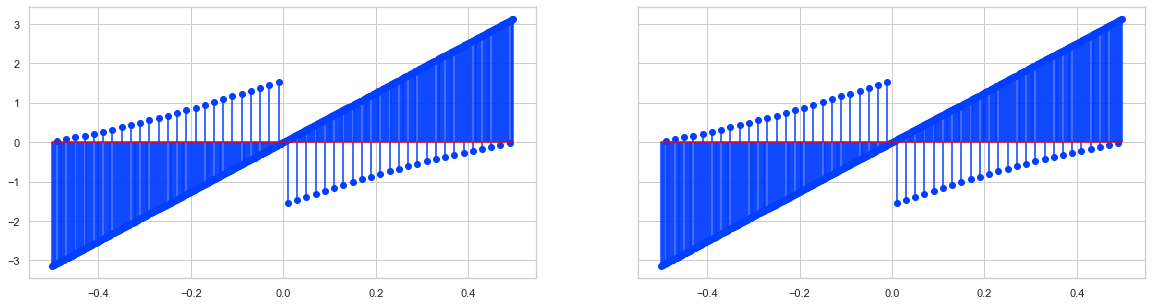

In [108]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

table3 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table3.add_row(['Freq_Mag','Multi Sines 1','Multi Sines 2',12.308618117207757,0.9245283018867925])
table3.add_row(['Freq_Phase','Multi Sines 1','Multi Sines 2',0.39269908169872414,0.6859504132231405])
print(table3)

In [109]:
'''fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
table4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])
print(table4)'''

"fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)\naxs[0].plot(ceps1)\naxs[1].plot(ceps2)\ntable4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])\ntable4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])\nprint(table4)"